In [20]:
import os
import glob
import matplotlib.pyplot as plt

from surfaces import Surfaces
from util_raster import get_raster_path, get_shadow_image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
if not os.path.exists('./data/metrics/'):
    os.makedirs('./data/metrics/')

In [ ]:
dates = ['summer', 'spring', 'winter']
cities = ['nyc', 'chi', 'lon', 'tok']
ranges = [[0,0.25],[0.25,1],[0.5,1],[0.75,1]]
zoom = 16

for city in cities:
    for date in dates:
        for rrange in ranges:
            stats = Surfaces.networks.driving.rasterstats_from_file('./data/osm/%s.osm.pbf'%city, './data/shadows_new/%s-%s/'%(city,date), zoom, rrange)
            outfilename = './data/metrics/streets_%s-%s_%s-%s.feather'%(city,date,str(rrange[0]).replace('.',''),str(rrange[1]).replace('.',''))
            stats.to_feather(outfilename)         

In [ ]:
dates = ['summer', 'spring', 'winter']
ranges = [[0,0.25],[0.25,1],[0.5,1],[0.75,1]]
zoom = 16

folders = glob.glob('./data/shadows_new/*/')

for folder in folders:
    tks = os.path.normpath(folder).split(os.path.sep)
    city, date = tks[-1].split('-')
    for rrange in ranges:
        stats = Surfaces.parks.rasterstats_from_file('./data/osm/%s.osm.pbf'%city, './data/shadows_new/%s-%s/'%(city,date), zoom, rrange)        
        outfilename = './data/metrics/parks_%s-%s_%s-%s.feather'%(city,date,str(rrange[0]).replace('.',''),str(rrange[1]).replace('.',''))
        stats.to_feather(outfilename)

In [20]:
stats

,min,max,mean,sum,median,nodata,area,name,geometry
222271,0.0,0.000000,0.000000,0.000000,0.000000,0,7.225507e+04,Yantacaw Park,"MULTIPOLYGON (((-74.15962 40.81410, -74.15906 ..."
270456,0.0,0.000000,0.000000,0.000000,0.000000,0,1.823411e+06,Tenafly Nature Center,"MULTIPOLYGON (((-73.95077 40.92315, -73.95036 ..."
916630,0.0,1.000000,0.001610,211.047059,0.000000,0,4.259991e+05,FDR boardwalk and beach,"MULTIPOLYGON (((-74.09278 40.56781, -74.09273 ..."
1751075,0.0,1.000000,0.536522,1574.156863,0.472549,0,9.506859e+03,John Jay Park,"MULTIPOLYGON (((-73.95027 40.76887, -73.94941 ..."
2389631,0.0,1.000000,0.143213,30741.631373,0.000000,0,6.962276e+05,Governors Island,"MULTIPOLYGON (((-74.02658 40.68574, -74.02657 ..."
...,...,...,...,...,...,...,...,...,...
1053399165,0.0,0.192157,0.099660,7.474510,0.101961,0,2.474758e+02,<NA>,"MULTIPOLYGON (((-74.10549 40.62053, -74.10548 ..."
1053399166,0.0,0.137255,0.009278,3.219608,0.000000,0,1.139148e+03,<NA>,"MULTIPOLYGON (((-74.10508 40.62072, -74.10506 ..."
1053399167,0.0,1.000000,0.155138,52.901961,0.031373,0,1.104448e+03,<NA>,"MULTIPOLYGON (((-74.10357 40.62123, -74.10355 ..."
1053399168,0.0,1.000000,0.418558,100.035294,0.231373,0,7.827936e+02,<NA>,"MULTIPOLYGON (((-74.10489 40.61963, -74.10487 ..."


In [31]:
stats[stats['name'].str.contains('Central Park')]

,min,max,mean,sum,median,nodata,area,name,geometry
225188063,0.188235,1.000000,0.610751,345.074510,0.470588,0,1.828744e+03,Central Park East Community Playground,"MULTIPOLYGON (((-73.94855 40.79337, -73.94851 ..."
427818536,0.000000,1.000000,0.096406,101486.258824,0.000000,0,3.409748e+06,Central Park,"MULTIPOLYGON (((-73.98141 40.76846, -73.98135 ..."
585788256,0.000000,0.015686,0.004082,0.498039,0.000000,0,3.990042e+02,Central Park Carousel,"MULTIPOLYGON (((-73.97538 40.76998, -73.97537 ..."


<AxesSubplot:>

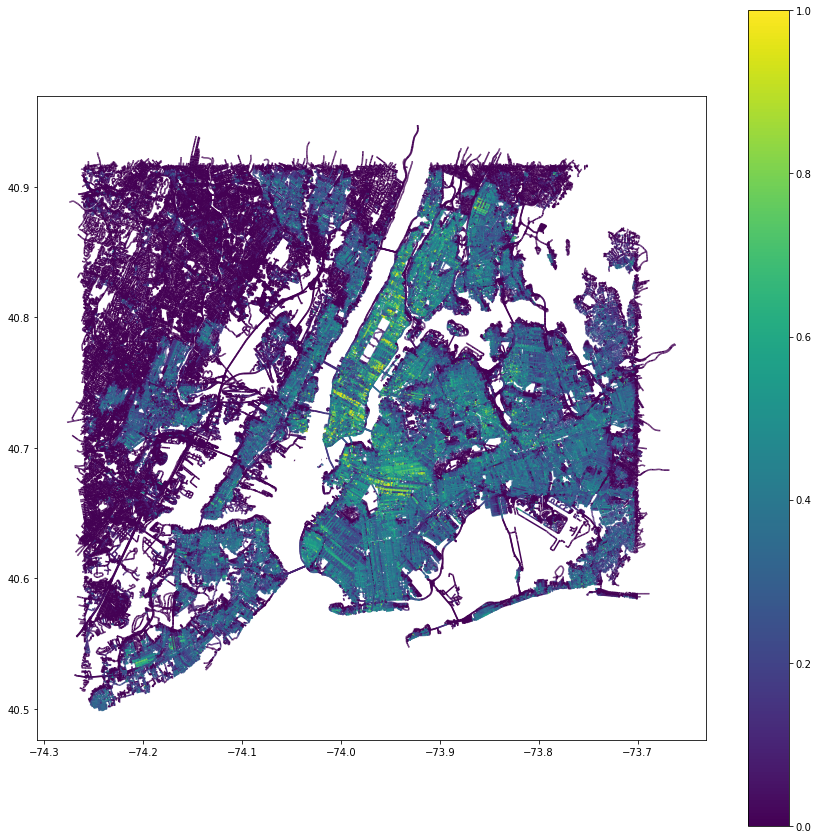

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
stats.plot(column='mean', ax=ax, legend=True)

<AxesSubplot:>

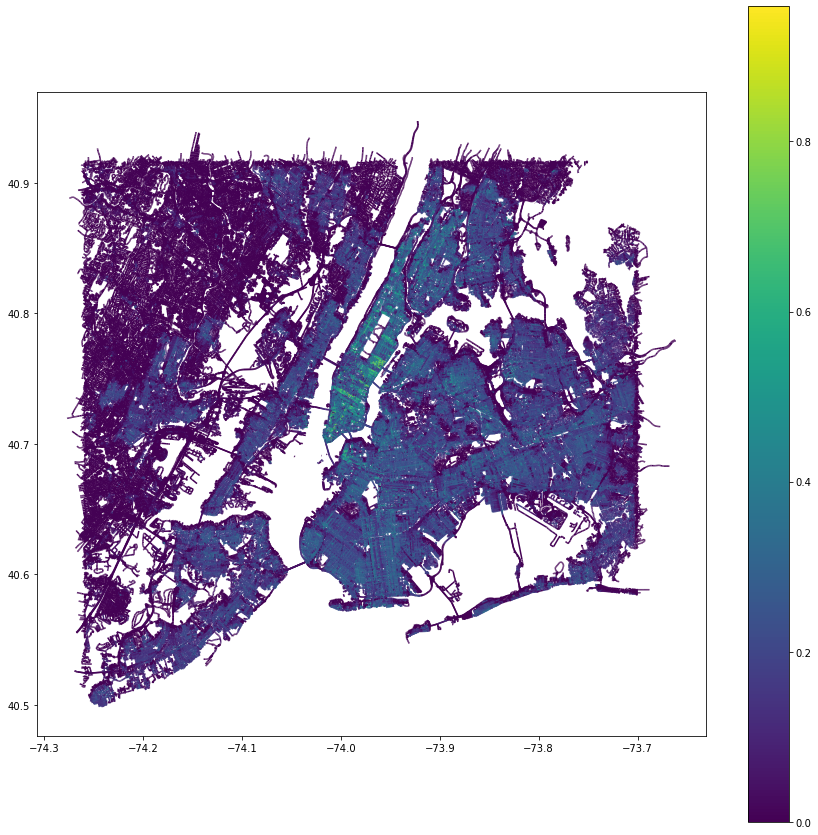

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
stats.plot(column='mean', ax=ax, legend=True)

<AxesSubplot:>

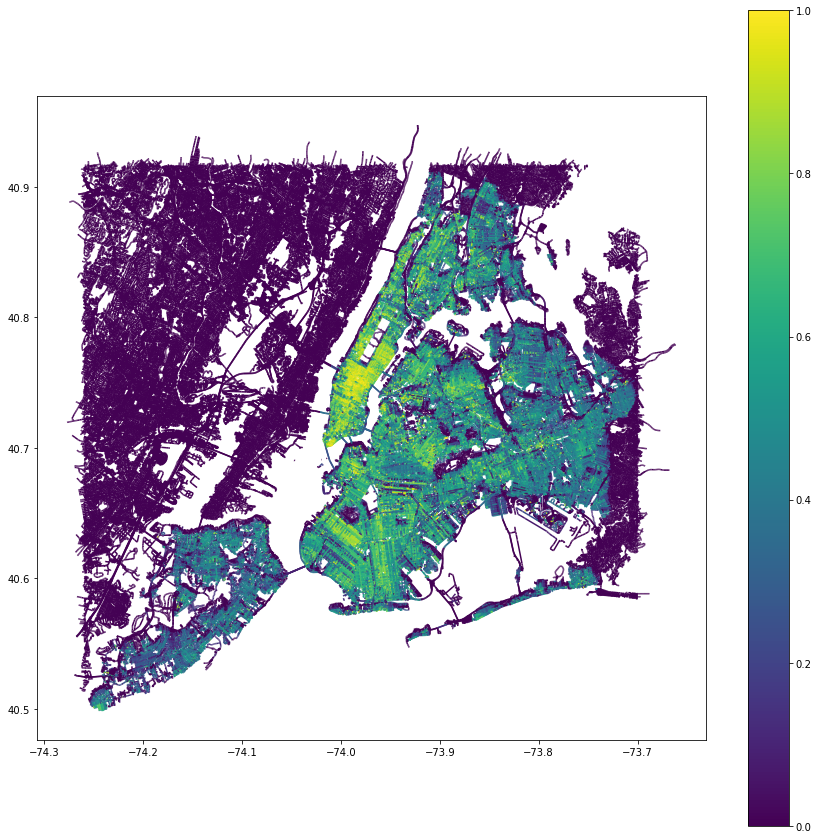

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
stats.plot(column='mean', ax=ax, legend=True)

In [9]:
path = get_raster_path(*[40.6986519312932, -74.04222185978449][::-1], *[40.800217630179155, -73.92257387648877][::-1],16,'./data/shadows/nyc-spring/')

./data/shadows/nyc-spring/16/[0-9]*/[0-9]*.png


In [24]:
arr = get_shadow_image(*[40.6986519312932, -74.04222185978449][::-1], *[40.800217630179155, -73.92257387648877][::-1],16,'./data/shadows/nyc-spring/')

In [59]:
import os
path = './data/shadows/nyc-spring\\16\\19249\\24593.png'
tks = os.path.normpath(path.replace('\\','/')).split(os.path.sep)
print(tks)
# re.findall(r'(?:[^/]|//)+', './data/shadows/nyc-spring\16\19249\24593.png')

./data/shadows/nyc-spring/16/19249/24593.png
['data', 'shadows', 'nyc-spring', '16', '19249', '24593.png']


In [60]:
import glob
for path in glob.iglob('./data/shadows/nyc-spring/16/*/*.png'):
    tks = os.path.normpath(path).split(os.path.sep)
    print(tks)

['data', 'shadows', 'nyc-spring', '16', '19249', '24591.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24592.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24593.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24594.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24595.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24596.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24597.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24598.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24599.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24600.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24601.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24602.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24603.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24604.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24605.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24606.png']
['data',

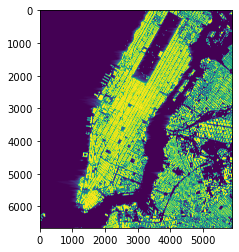

In [25]:
import cv2
import matplotlib.pyplot as plt
# arr = cv2.imread(path)
plt.imshow(arr)

In [15]:
stats

<generator object DescriptorNetwork._ at 0x000002BE44612120>